In [190]:
import pandas as pd
import numpy as np
import datetime
import string
import names
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
np.random.seed(42) # this "fixes" the random results and thus guarantees reproducability for the first time its run

In [192]:
ADJECTIVES = [
    'cool','smart','beautiful','funky','dorky', 'babyish', 'back', 'bad', 'baggy', 'bare', 'barren',
    'calculating', 'calm', 'candid', 'canine', 'capital', 'carefree', 'hairy', 'half', 'handmade', 'handsome', 'handy'
]

PEOPLE = [
    names.get_first_name().lower() for i in range(1000)
]

PRODUCTS = [
    'airplane','banana','train','bow','map','skull'
]

In [193]:
def name_generator(adj,sub,number_names=10):
    if number_names >= len(adj)*len(sub):
        raise ValueError("can't generate this many names")
    res = set()
    while len(res) < number_names+1:
        new_name = f'{np.random.choice(adj)}_{np.random.choice(sub)}'
        res = res | set([new_name])
    return list(res)

In [194]:
def generate_order_id(size=16, chars=list(string.ascii_uppercase + string.digits)):
    return ''.join(np.random.choice(chars) for _ in range(size))

In [222]:
def generate_dummy_data(
    dummy_products,
    dummy_customers,
    dummy_customer_types = ['company','private','government'],
    first_date=datetime.datetime(2014,1,1),
    last_date=datetime.datetime(2018,1,1),
    data_points=1000):
    
    customer_type = {customer:np.random.choice(['company','private','government']) for customer in dummy_customers}
    product_prices = {product:np.random.randint(100,10000) for product in dummy_products}

    df = pd.DataFrame({
        'order_id' : [generate_order_id() for i in range(data_points)],
        'order_date' : [np.random.choice(pd.date_range(first_date,last_date)) for i in range(data_points)],
        'customer' : [np.random.choice(customers) for i in range(data_points)],
        'product' : [np.random.choice(products) for i in range(data_points)],
        'order_size': [np.random.randint(1,5) for i in range(data_points)]
    })
    df['customer_type'] = df['customer'].map(customer_type)
    df['product_price'] = df['product'].map(product_prices)
    df['basket_size'] = df['order_size']*df['product_price']
    
    return df

In [223]:
customers = name_generator(ADJECTIVES,PEOPLE,2000)
products = name_generator(ADJECTIVES, PRODUCTS, 10)

In [225]:
generate_dummy_data(products,customers)

,order_id,order_date,customer,product,order_size,customer_type,product_price,basket_size
0,PNES11BV2PMLJ0LT,2015-05-11,bare_michele,smart_airplane,4,government,929,3716
1,XODL7YRC4MLOS1MK,2017-07-21,bad_mamie,funky_skull,2,government,2213,4426
2,FEALASFSHVWXF9UC,2015-05-22,back_anthony,babyish_train,3,government,5473,16419
3,MJ5VBABF50XZAZAW,2017-11-28,cool_elin,cool_train,2,company,515,1030
4,YZNL3SC5RDP0M1NF,2017-09-07,carefree_roger,funky_train,3,private,4235,12705
5,OCVM4U1M489RGCMY,2015-02-12,beautiful_genevieve,calculating_banana,2,private,175,350
6,3ZCSONR1PWMWV8P8,2014-04-16,bare_ellen,bare_map,3,company,7107,21321
7,MJCQBODQPSBZ03TG,2014-11-03,bad_wm,babyish_train,1,company,5473,5473
8,KAHNB2VA5RER3UEL,2016-12-29,canine_michele,cool_train,2,private,515,1030
9,JYUI1L7D8GPRT6JF,2016-03-05,cool_gene,babyish_skull,2,government,5208,10416


# Data enrichtment (generate first oder dates and add)

In [208]:
# NamedAgg is an amazing new feature from pandas 0.25.0
customer_data = df.groupby('customer').agg(
    customer_first_order = pd.NamedAgg(column='order_date', aggfunc=np.min),
)
customer_data.head(2)

,customer_first_order
customer,
babyish_alesha,2014-03-05
babyish_alicia,2015-03-24


In [220]:
df.loc[df.customer.isin(list(customer_data.index[0:2]))].sort_values(by=['customer','order_date'])

,order_id,order_date,customer,product,order_size,customer_type,product_price,basket_size,customer_first_order,type_of_order
7119,8K8W0RSCX1LOX2AQ,2014-03-05,babyish_alesha,beautiful_train,1,company,9959,9959,2014-03-05,first
7124,QHH2P1PKXJUQ9OHF,2014-04-06,babyish_alesha,back_airplane,4,company,2989,11956,2014-03-05,repeat
7126,6MIGH0LN9H619FLK,2014-10-24,babyish_alesha,hairy_airplane,1,company,1552,1552,2014-03-05,repeat
7123,6RJBKU4649EUWS4L,2015-09-10,babyish_alesha,canine_bow,1,company,8009,8009,2014-03-05,repeat
7121,JKDWKFH7TBAYITR0,2015-10-16,babyish_alesha,hairy_bow,4,company,4011,16044,2014-03-05,repeat
7122,90Z5RP3R8AVGVS0Q,2015-11-03,babyish_alesha,canine_bow,3,company,8009,24027,2014-03-05,repeat
7120,XMK4XBZRLPRTLL28,2016-05-02,babyish_alesha,handy_train,1,company,3150,3150,2014-03-05,repeat
7125,K0U95D0KPH22JKO5,2016-05-20,babyish_alesha,beautiful_train,3,company,9959,29877,2014-03-05,repeat
5332,HGTRTYQVKTV6QF20,2015-03-24,babyish_alicia,canine_bow,3,company,8009,24027,2015-03-24,first
5333,SNOKORLK2DDEQ72M,2015-09-25,babyish_alicia,calculating_banana,1,company,1924,1924,2015-03-24,repeat


In [210]:
df = pd.merge(df,customer_data.reset_index(),on='customer')
df.head(2)

,order_id,order_date,customer,product,order_size,customer_type,product_price,basket_size,customer_first_order
0,FS5BKM6DLYUNFS10,2014-05-08,dorky_amberly,calculating_banana,3,company,1924,5772,2014-05-08
1,7X6M3M6ZPOQ5M7QO,2015-12-27,dorky_amberly,canine_bow,1,company,8009,8009,2014-05-08


In [211]:
#determine if a order is a repeat order or first order
df['type_of_order'] = np.where(df['order_date'] != df['customer_first_order'], 'repeat', 'first')

In [236]:
def fortmatQuarter(x):
    quarter = (x.month-1)//3 + 1    
    return str(x.year)+'-Q'+str(quarter)

def generate_cohort_analysis(df, parameter, record_type='all', period_agg='quarterly', no_fig=True,size=10):
    """
    For parameter use 'number_of_orders', 'number_of_items_bought'  or 'total_order_value'
    For record_type use 'all' or specific customer_type ['private','company','government']
    no_fig controlls the output of a figure, by default True (i.e. no figure)
    """

    dataset = df.copy()
    if record_type != 'all':
        dataset = df[df.customer_type == record_type].copy()

    if period_agg=='quarterly':
        dataset['cohort'] = dataset['customer_first_order'].apply(lambda x: fortmatQuarter(x))
        dataset['order_period'] = dataset['order_date'].apply(lambda x: fortmatQuarter(x))
    elif period_agg=='monthly':
        dataset['cohort'] = dataset['customer_first_order'].apply(lambda x: x.strftime('%Y-%m'))
        dataset['order_period'] = dataset['order_date'].apply(lambda x: x.strftime('%Y-%m'))
    else:
        raise NotImplementedError(f'period_agg: {period_agg} is not implemented')


    grouped = dataset.groupby(['cohort','order_period'])

    cohorts = grouped.agg(
        number_of_orders = pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique),
        number_of_items_bought = pd.NamedAgg(column='order_size', aggfunc=sum),
        total_order_value = pd.NamedAgg(column='basket_size', aggfunc=sum)
    )

    inp = cohorts[parameter].unstack(0)

    in_thousand = ''
    if parameter == 'total_order_value':
        inp = inp / 1000
        in_thousand = 'in thousand €'

    # New Accounts
    cohort_group_size = dataset.groupby('cohort').agg({'customer': pd.Series.nunique})
    new_accs = cohort_group_size.reset_index()
    new_accs.columns = ['cohort', 'New Accounts']

    # Repeat Percentage (This looks at actual repeat bookings, 
    # that means specifically the second booking in the first month of booking is considered repeat)
    repeat_perc = dataset.groupby(['cohort', 'type_of_order']).agg(
        number_of_orders = pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique),
        number_of_items_bought = pd.NamedAgg(column='order_size', aggfunc=sum),
        total_order_value = pd.NamedAgg(column='basket_size', aggfunc=sum)
    ).unstack()

    
    repeat_perc = repeat_perc.stack().T.stack(level=0).fillna(0)
    repeat_perc['percentage repeat'] = repeat_perc['repeat']/repeat_perc.sum(axis=1)
    repeat_perc = repeat_perc.unstack(level=0).iloc[:,-3:]
    
    repeat_perc.columns = ['Orders Repeat %', 'Items Bought Repeat %', 'Order Value Repeat %']

    if parameter == 'number_of_orders':
        selection = 'Orders Repeat %'
        heatmapformat = ".0f"
    if parameter == 'number_of_items_bought':
        selection = 'Items Bought Repeat %'
        heatmapformat = ".0f"
    if parameter == 'total_order_value':
        selection = 'Order Value Repeat %'
        heatmapformat = ".1f"
    if not selection:
        raise NotImplementedError('No repeat figures for specified parameter')

    # get the correct repeat figure
    repeat_perc = repeat_perc[selection].reset_index()

    if no_fig:
        return (inp.T.join(new_accs.set_index('cohort')).fillna(0))
    
    #### Plot the Data ####
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7), gridspec_kw={'width_ratios': (1, 14, 1)})

    # plot new accounts
    Accounts = sns.barplot(x="New Accounts", y='cohort', data=new_accs, palette="Blues", ax=ax1)
    # end plot new accounts

    # plot matrix
    Heatmap = sns.heatmap(inp.T,
                          mask=inp.T.isnull(),
                          cmap="Blues",
                          annot=True,
                          fmt=heatmapformat,
                          annot_kws={"size": size},
                          cbar=False,
                          ax=ax2)

    title = 'Retention Matrix for "{}" {} - for Account Type {}'.format(parameter, in_thousand, record_type)
    Heatmap.set_title(title)
    Heatmap.yaxis.get_label().set_visible(False)
    Heatmap.set(yticklabels=[])
    Heatmap.set_xlabel('order_period')
    # end plot matrix

    # plot repeat table
    Repeats = sns.barplot(x=selection, y='cohort', data=repeat_perc, palette="Blues", ax=ax3)
    Repeats.yaxis.get_label().set_visible(False)
    Repeats.set(yticklabels=[])
    vals = Repeats.get_xticks()
    Repeats.set_xticklabels(['{:,.0f}%'.format(x * 100) for x in vals])
    # end plot repeat

    sns.despine(left=True, bottom=True, right=True)
    plt.tight_layout()

    fig = Heatmap.get_figure()
    inp.T.join(new_accs.set_index('cohort')).to_excel(parameter+'RetentionMatrix'+record_type+'.xlsx')
    fig.savefig(parameter+'RetentionMatrix'+record_type+'.png', bbox_inches='tight', dpi=600)



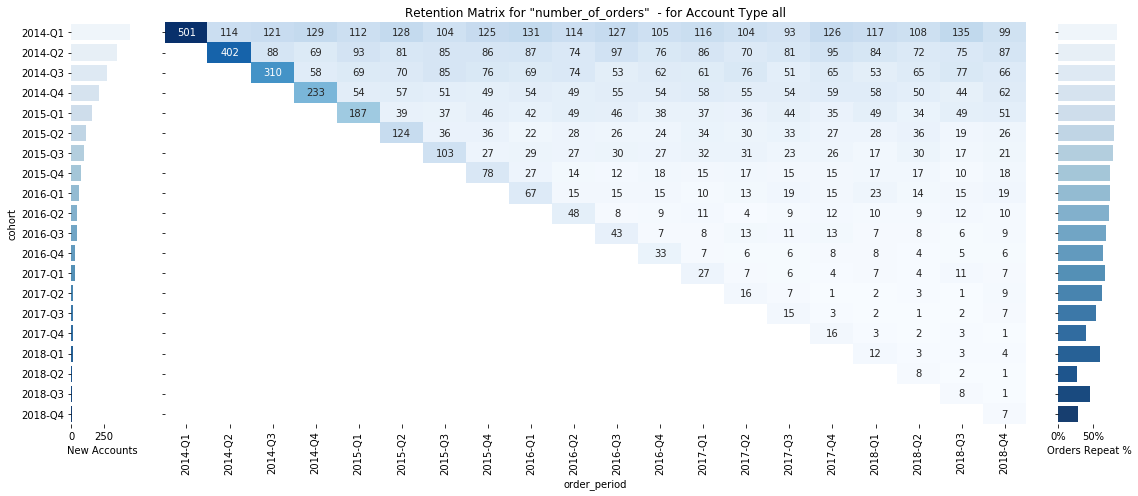

In [237]:
generate_cohort_analysis(df,'number_of_orders',period_agg='quarterly',no_fig=False)

In [238]:
!open .